# ECHELON FORM AND ROW REDUCED FORM

9/03/2022

Francesca Mazzia

license: Creative Commons non-commercial not derivative works - 2.5 Italy License http://creativecommons.org/licenses/by-nc-nd/2.5/it/

###  Row Reduced Echelon Form

we use the symbolic package that compute the row reduce echelon form  

In [1]:
# import sympy  
import sympy as sym
  
AS = sym.Matrix([[1, 2, 2, 3, 1, 0, 0], [2, 4, 1, 3, 0,1,0], [3, 6, 1, 4,0,0,1]])  
print("Matrix : {} ".format(AS)) 
   
# Use sympy.rref() method  
AS_rref = AS.rref()   
      
print("The Row reduced echelon form of matrix M and the pivot columns : {}".format(AS_rref))   


Matrix : Matrix([[1, 2, 2, 3, 1, 0, 0], [2, 4, 1, 3, 0, 1, 0], [3, 6, 1, 4, 0, 0, 1]]) 
The Row reduced echelon form of matrix M and the pivot columns : (Matrix([
[1, 2, 0, 1, 0, -1,  1],
[0, 0, 1, 1, 0,  3, -2],
[0, 0, 0, 0, 1, -5,  3]]), (0, 2, 4))


we construct a function with in Input a Matrix of size m x n and that give in output the echelon form. The permutation is performed in order to have a stable algorithm using the technique of partial pivoting.

In [4]:
import numpy as np
  
A = np.array([[1, 2, 2, 3], [2, 4, 1, 3], [3, 6, 1, 4]]) 



In [5]:
def ef(A): 
    U = np.copy(A) # copy the matrix A in U 
    (m,n)=A.shape
    j = 0 # index related to the column
    p =[]
    for i in range(0,m): 
        ech=1
        while (ech == 1) & (j < n):
          indm=np.argmax(abs(U[i:m,j])) # if an exchange is necessary
          indm=indm+i
          if  (abs(U[i,j])==0 ): # this row need to br changed for stability
             U[ [i, indm],:]=U[[indm,i],:]  
          if (abs(U[i,j]) > 0): 
             p.append(j)
             M = U[i+1:m,j]/U[i,j] # vector because we do elimination of all the row below the pivotal one
                # in numpy array there is no difference row vectors or column vectors
                # np.outer to perform the outer product
             U[i+1:m,j+1:n]=U[i+1:m,j+1:n]-np.outer(M,U[i,j+1:n]) 
           
             U[i+1:m,j]=0
             j=j+1
             ech=0
            
          else:
            j=j+1
            ech=1      
    return(U,p)    


In [6]:
U,p=ef(A)
print(U)

[[ 1  2  2  3]
 [ 0  0 -3 -3]
 [ 0  0  0  0]]


In [7]:
def rref(A):
    U = np.copy(A)
    (m,n)=A.shape
    j = 0
    p =[]
    for i in range(0,m): 
        ech=1
        while (ech == 1) & (j < n):
          indm=np.argmax(abs(U[i:m,j]))
          indm=indm+i
          if  (abs(U[indm,j]) == 0): # perform the permutation
             U[ [i, indm],:]=U[[indm,i],:] 
          if ( abs(U[i,j]) > 0):
             p.append(j)
             M=U[i+1:m,j]/U[i,j]
             U[i+1:m,j+1:n]=U[i+1:m,j+1:n]-np.outer(M,U[i,j+1:n])
             U[i+1:m,j]=0           
             U[i,j:n] = U[i,j:n]/U[i,j]   # the pivotal element should be 1        
             if i>0:
               M= U[0:i,j]/U[i,j]
               U[0:(i),j:n]=U[0:i,j:n]-np.outer(M,U[i,j:n])     
             j=j+1
             ech=0
          else:
            j=j+1
            ech=1
            
    return(U,p)    



In [8]:
U,p=rref(A)
print(U)

[[1 2 0 1]
 [0 0 1 1]
 [0 0 0 0]]


In [9]:
A = np.array([[1e-17, 1, 1 ], [1, 2, 3] ]) 
(U,p)=ef(A)
print(U)
print('index pivots = ',p)

[[ 1.e-17  1.e+00  1.e+00]
 [ 0.e+00 -1.e+17 -1.e+17]]
index pivots =  [0, 1]


In [10]:
(U,p)=rref(A)
print(U)
print('index pivots = ',p)

[[1. 0. 0.]
 [0. 1. 1.]]
index pivots =  [0, 1]


In [11]:
def ef_withpivot(A): 
    U = np.copy(A) # copy the matrix A in U 
    (m,n)=A.shape
    j = 0 # index related to the column
    p =[]
    for i in range(0,m): 
        ech=1
        while (ech == 1) & (j < n):
          indm=np.argmax(abs(U[i:m,j])) # find the pivotal index, maximum element in the column j
          indm=indm+i
          if (indm != i) & (abs(U[indm,j]) > 1e-15): # perform the permutation to work well we should change != 0 with an absolute value less then a constant very small
             U[ [i, indm],:]=U[[indm,i],:]
          if (abs(U[i,j]) > 0):
             p.append(j)
             M = U[i+1:m,j]/U[i,j] # vector because we do elimination of all the row below the pivotal one
                # in numpy array there is no difference row vectors or column vectors
                # np.outer to perform the outer product
             U[i+1:m,j+1:n]=U[i+1:m,j+1:n]-np.outer(M,U[i,j+1:n]) 
           
             U[i+1:m,j]=0
             j=j+1
             ech=0
          else:
            j=j+1
            ech=1      
    return(U,p)    



In [12]:
A = np.array([[1., 2., 2., 3.], [2, 4, 1, 3], [3, 6, 1, 4]]) 
U,p=ef_withpivot(A)
print(U,p)


[[3.00000000e+00 6.00000000e+00 1.00000000e+00 4.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.66666667e+00 1.66666667e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16]] [0, 2, 3]


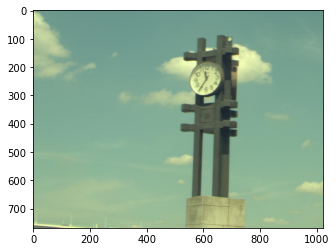

In [109]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('0002.jpg')
imgplot = plt.imshow(img)

shape of original image (768, 1024, 3)
shape gray scale (768, 1024)


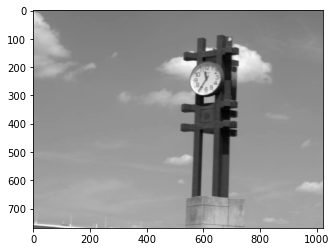

In [170]:
import numpy as np
import scipy.linalg as spl
print('shape of original image',img.shape)
rgb_weights = [0.2989, 0.5870, 0.1140]
imgg=np.dot(img,rgb_weights)
print('shape gray scale',imgg.shape)
imgplot = plt.imshow(imgg,cmap=plt.get_cmap("gray"))

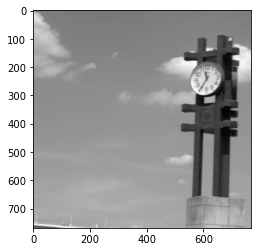

In [175]:
U,p=ef_withpivot(imgg)
imgplot = plt.imshow(imgg[:,p],cmap=plt.get_cmap("gray"))


In [176]:
print(len(p))

768


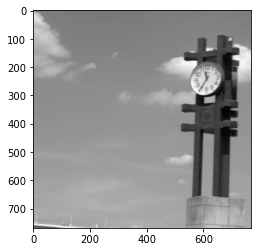

In [177]:
imggT=np.transpose(imgg[:,p])
U,p=ef_withpivot(imggT)
imgplot = plt.imshow(np.transpose(imggT[:,p]),cmap=plt.get_cmap("gray"))


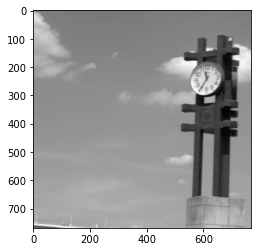

In [178]:
imggS=np.transpose(imggT[:,p])
U,p=ef_withpivot(imggS)
imgplot = plt.imshow((imggS[:,p]),cmap=plt.get_cmap("gray"))


In [179]:
print(len(p))

768


Exercise:  use the function of sympy sp.rref to compute the row reduced form of the matrix in the exercise 4.2.1  on page 178 of the book of Carl Meyer and find the  spanning sets for all the four fundamental subspaces


we construct a function with in Input a Matrix of size m x n and that give in output the row reduced echelon form echelon form. The permutation is performed in order to have a stable algorithm using the technique of partial pivoting.

In [180]:
def rref_withpivot(A):
    U = np.copy(A)
    (m,n)=A.shape
    P = np.eye(m)
    j = 0
    for i in range(0,m): 
        ech=1
        while (ech == 1) & (j < n):
          indm=np.argmax(abs(U[i:m,j]))
          indm=indm+i
          if (indm != i) & (abs(U[indm,j]) > 1e-15): # perform the permutation
             U[ [i, indm],:]=U[[indm,i],:] 
             P[ [i, indm],:]=P[[indm,i],:] 
          if ( abs(U[i,j]) > 1e-15):
             M=U[i+1:m,j]/U[i,j]
             U[i+1:m,j+1:n]=U[i+1:m,j+1:n]-np.outer(M,U[i,j+1:n])
             U[i+1:m,j]=0           
             U[i,j:n] = U[i,j:n]/U[i,j]   # the pivotal element should be 1        
             if i>0:
               M= U[0:i,j]/U[i,j]
               U[0:(i),j:n]=U[0:i,j:n]-np.outer(M,U[i,j:n])     
             j=j+1
             ech=0
          else:
            j=j+1
            ech=1
            
    return(U,P)    




In [181]:
A = np.array([[1., 2., 2., 3., 1., 0, 0], [2, 4, 1, 3, 0,1,0], [3, 6, 1, 4,0,0,1]]) 
(U,P)=rref_withpivot(A)
print(U[0:3,0:4])
print(U[0:3,4:7])

[[1.00000000e+00 2.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11022302e-16]]
[[ 0. -1.  1.]
 [ 0.  3. -2.]
 [ 1. -5.  3.]]


In [182]:
B = np.random.rand(3,3)
I = np.eye(3)
A = np.block([B,I]) # to define a matrix using its blocks

In [183]:
A

array([[0.47959601, 0.95228093, 0.59799762, 1.        , 0.        ,
        0.        ],
       [0.73899637, 0.5985809 , 0.6685811 , 0.        , 1.        ,
        0.        ],
       [0.05965538, 0.18756206, 0.81007432, 0.        , 0.        ,
        1.        ]])

In [184]:
m = 3
n = 3
(U,P)=rref_withpivot(A)
print(U[0:m,0:n])
print(U[0:m,n:m+n])
X=U[0:m,n:m+n]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[-1.20575653  2.21116842 -0.93485976]
 [ 1.87409101 -1.18341892 -0.40674101]
 [-0.34512699  0.11117055  1.39747499]]


In [185]:
np.dot(B,X)

array([[ 1.00000000e+00,  5.51027489e-17, -4.68626299e-18],
       [-2.14886530e-17,  1.00000000e+00,  4.60786708e-17],
       [ 6.34082409e-17, -2.49800585e-17,  1.00000000e+00]])

In [186]:
np.dot(X,B)

array([[ 1.00000000e+00,  4.81960508e-17,  1.85799251e-16],
       [ 5.82537494e-17,  1.00000000e+00,  3.01393164e-17],
       [-1.53786937e-17, -1.18459106e-17,  1.00000000e+00]])

Exercise:  use the function rref_withpivot to compute the row reduced form of the matrix in the exercise 4.2.1  on page 178 of the book of Carl Meyer and find the  spanning sets for all the four fundamental subspaces